In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow.keras as keras
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
#split into training and testing
seed=12
np.random.seed(seed)

In [2]:
DATASET_PATH = "C:/ML-Final-Project/data.json"

In [3]:
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data = json.load(fp)
        
    #convert lists into numpy arrays
        inputs = np.array(data["mfcc"])
        targets = np.array(data["labels"])
        
        return inputs, targets
    

In [4]:
def plot_history(history):
    
    fig,axs = plt.subplots(2)
    
    #create accuracy subplots:
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [5]:
#load data
inputs,targets = load_data(DATASET_PATH)
inputs.shape

(9986, 130, 13)

In [6]:
###BUILDING A RNN

In [7]:
def prepare_datasets(test_size,validation_size):
    X,y = load_data(DATASET_PATH)
    
    #split into train and test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
    
    #create train/validation split
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=validation_size)
    
    return X_train, X_validation, X_test, y_train,y_validation,y_test

In [8]:
X_train, X_validation, X_test, y_train,y_validation,y_test = prepare_datasets(0.25,0.2)
X_train.ndim

3

In [9]:
def build_model(input_shape):
    #create RNN-LSTM model
    model = keras.Sequential()
    
    #build 2 LSTM layers
    model.add(keras.layers.LSTM(256, input_shape=input_shape,return_sequences=True))
    
    model.add(keras.layers.LSTM(128,input_shape=input_shape,return_sequences=True))
    
    model.add(keras.layers.LSTM(64))
    
    #dense layer
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    #output layer
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

In [11]:
#Building the CNN
input_shape = (X_train.shape[1],X_train.shape[2]) #130x13
model= build_model(input_shape)

In [12]:
#compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics =["accuracy"])

In [17]:
def plot_history(history):
    
    fig,axs = plt.subplots(2)
    
    #create accuracy subplots:
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval of RNN")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval of RNN")

    plt.show()

In [22]:
model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)

Epoch 1/30
188/188 [==============================] - 60s 319ms/step - loss: 1.9850 - accuracy: 0.3267 - val_loss: 1.6643 - val_accuracy: 0.4533
Epoch 2/30
188/188 [==============================] - 64s 342ms/step - loss: 1.5460 - accuracy: 0.4832 - val_loss: 1.3733 - val_accuracy: 0.5334
Epoch 3/30
188/188 [==============================] - 67s 356ms/step - loss: 1.3425 - accuracy: 0.5458 - val_loss: 1.2718 - val_accuracy: 0.5768
Epoch 4/30
188/188 [==============================] - 65s 345ms/step - loss: 1.2288 - accuracy: 0.5870 - val_loss: 1.1906 - val_accuracy: 0.6028
Epoch 5/30
188/188 [==============================] - 66s 350ms/step - loss: 1.1283 - accuracy: 0.6298 - val_loss: 1.2412 - val_accuracy: 0.5821
Epoch 6/30
188/188 [==============================] - 67s 358ms/step - loss: 1.0557 - accuracy: 0.6546 - val_loss: 1.0810 - val_accuracy: 0.6422
Epoch 7/30
188/188 [==============================] - 69s 365ms/step - loss: 0.9642 - accuracy: 0.6822 - val_loss: 1.0154 - val_ac

In [18]:
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=5)
plt_history(history)

Epoch 1/5
188/188 [==============================] - 60s 320ms/step - loss: 1.0766 - accuracy: 0.6516 - val_loss: 1.0925 - val_accuracy: 0.6355
Epoch 2/5
188/188 [==============================] - 65s 346ms/step - loss: 0.9973 - accuracy: 0.6827 - val_loss: 1.0732 - val_accuracy: 0.6395
Epoch 3/5
188/188 [==============================] - 67s 356ms/step - loss: 0.9422 - accuracy: 0.7012 - val_loss: 1.0804 - val_accuracy: 0.6422
Epoch 4/5
188/188 [==============================] - 66s 354ms/step - loss: 0.8889 - accuracy: 0.7206 - val_loss: 0.9450 - val_accuracy: 0.6842
Epoch 5/5
188/188 [==============================] - 68s 361ms/step - loss: 0.8268 - accuracy: 0.7379 - val_loss: 0.9162 - val_accuracy: 0.6923


NameError: name 'plt_history' is not defined

In [23]:
#evaluate RNN on test ste
test_error,test_accuracy = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is:{}".format(test_accuracy))

79/79 [==============================] - 9s 113ms/step - loss: 0.9191 - accuracy: 0.7589
Accuracy on test set is:0.7589107155799866


In [29]:
def predict(model,X,y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)  #X is a 3D array and predicition is a 2d array
    
    #extract index with max value
    predicted_index = np.argmax(prediction,axis=1)
    print("The expected index:{}, Predicted index:{}".format(y,predicted_index))

In [30]:
#make prediciton on a smaple
X =X_test[70]
y = y_test[70]
predict(model,X,y)

The expected index:2, Predicted index:[5]


In [24]:
len(X_test)
y_pred = []
for i in range(len(X_test)):
    Y = X_test[i] 
    Y = Y[np.newaxis,...]
    prediction = model.predict(Y)
    y_pred.append(np.argmax(prediction,axis=1))
len(y_pred)

2497

In [31]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('RNN-LSTM-Confusion-matrix.jpg')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [32]:
label_dict ={'blues':0,'classical':1,'country':2,'disco':3,'hiphop':4,'jazz':5,'metal':6,'pop':7,'reggae':8,'rock':9}
label_dict.keys()

dict_keys(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

Confusion matrix, without normalization
[[171   1  13  12   3   5   4   0   9   7]
 [  0 226   1   0   3   8   0   0   1   3]
 [  7   3 168  17   2  18   1   2  18  23]
 [  2   1   3 188  12   1   9   9  15  10]
 [  1   2   6  14 184   0  10   9  24   1]
 [  3  17  20   0   1 182   1   3   7   6]
 [  1   0   2   4   9   2 241   0   1   9]
 [  1   0   3   7  11   3   0 222   9   3]
 [  4   1   9  10  18   1   1   4 189   5]
 [ 14   0  22  39  12   9  22   8  10 124]]


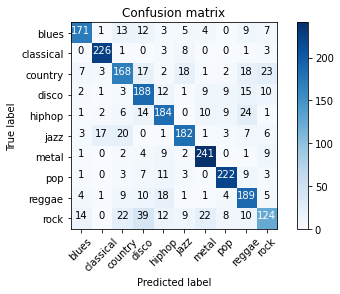

In [33]:
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_pred), 
                      classes=label_dict.keys())

In [2]:
help(keras.layers.RNN)

Help on class RNN in module tensorflow.python.keras.layers.recurrent:

class RNN(tensorflow.python.keras.engine.base_layer.Layer)
 |  RNN(*args, **kwargs)
 |  
 |  Base class for recurrent layers.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Arguments:
 |    cell: A RNN cell instance or a list of RNN cell instances.
 |      A RNN cell is a class that has:
 |      - A `call(input_at_t, states_at_t)` method, returning
 |        `(output_at_t, states_at_t_plus_1)`. The call method of the
 |        cell can also take the optional argument `constants`, see
 |        section "Note on passing external constants" below.
 |      - A `state_size` attribute. This can be a single integer
 |        (single state) in which case it is the size of the recurrent
 |        state. This can also be a list/tuple of integers (one size per state).
 |        The `state_size` can also be TensorShape or tuple/list of
 |  